In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [35]:
!pip install statsmodels

In [36]:
# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

In [51]:
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: title={'center': 'Air Passenger Data'}, xlabel='Month'>

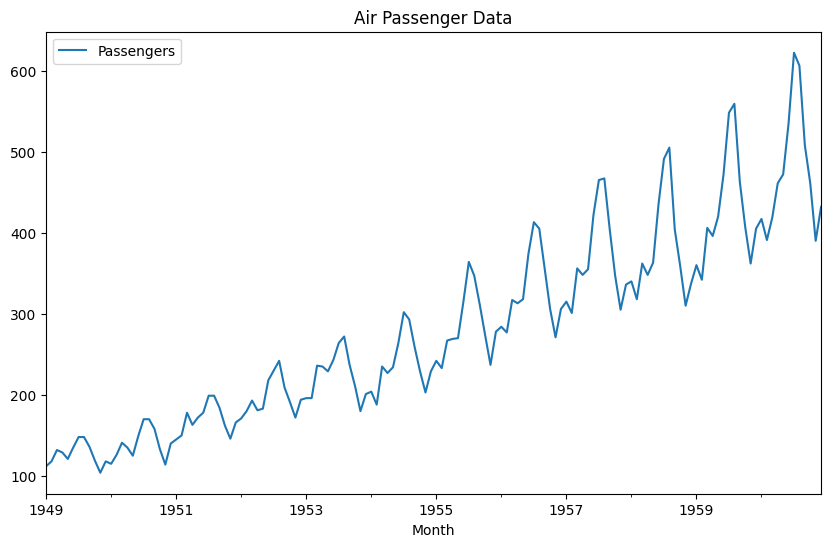

In [53]:
# Step 2: Visualize the original data
data.plot(title="Air Passenger Data", figsize=(10, 6))
#data.plot()plt.show()

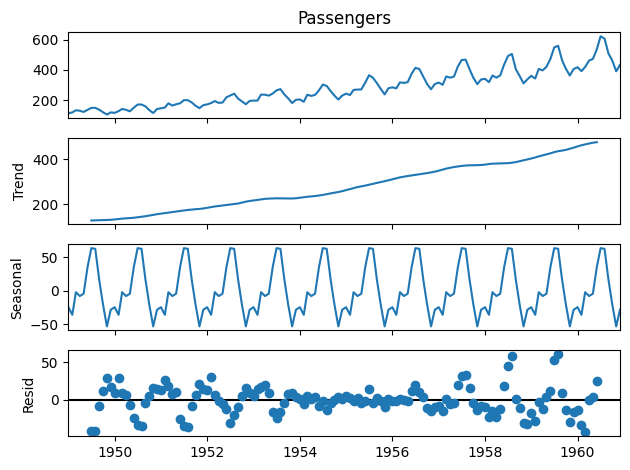

In [77]:
# Step 3: Perform time series decomposition to extract trend, seasonality, and residuals
result = seasonal_decompose(data['Passengers'], model='additive')
result.plot()
plt.show()

In [83]:
# Step 4: Apply the ARIMA model for forecasting
# Define ARIMA parameters (p, d, q)
model_arima = ARIMA(data['Passengers'], order=(4, 1, 1))
# Fit the modelarima_result = model_arima.fit()
# Generate predictions using ARIMA
data['ARIMA_Predictions'] = arima_result.predict(start=1, end=len(data), dynamic=False)
data

C:\Users\kishr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kishr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kishr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Passengers,ARIMA_Predictions
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.040619
1949-03-01,132,119.849452
1949-04-01,129,135.981216
1949-05-01,121,124.559777
...,...,...
1960-08-01,606,629.699400
1960-09-01,508,580.096670
1960-10-01,461,449.510714


In [ ]:
# Forecast 12 months into the future
forecast_arima = arima_result.get_forecast(steps=12)
forecast_arima_index = pd.date_range(data.index[-1], periods=12, 
freq='MS')
forecast_arima_values = forecast_arima.predicted_mean
forecast_arima_ci = forecast_arima.conf_int()
forecast_arima = arima_result.get_forecast(steps=12)
forecast_arima
<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper at 
0x147731df0>
forecast_arima_index = pd.date_range(data.index[-1], periods=12, freq='MS')forecast_arima_index

DatetimeIndex(['1960-12-01', '1961-01-01', '1961-02-01', '1961-03-01',
               '1961-04-01', '1961-05-01', '1961-06-01', '1961-07-01',
               '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-
01'],
               dtype='datetime64[ns]', freq='MS')


forecast_arima_values = forecast_arima.predicted_mean
forecast_arima_values